# EDA

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Display settings
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 120)
plt.rcParams['figure.figsize'] = (10,6)
sns.set_style('whitegrid')


## Load the dataset

In [ ]:
df = pd.read_csv("/Users/tanya-mac/Desktop/Health Risk Predictor from Lifestyle & Medical History/data/processed/final_data.csv")
print('Shape:', df.shape)
df.head()


Shape: (97297, 33)


,Age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,hypertension_risk_score,heart_disease_risk_score,obesity_risk_score,cholesterol_risk_score
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,7.9,7.9,0,0,0,30.5,0.89,134,78,68,239,41,160,145,136,236,6.36,8.18,51.716583,53.581369,50.796020,57.387241,51.492983
1,52,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,6.5,8.7,0,0,0,23.1,0.80,129,76,67,116,55,50,30,93,150,2.00,5.63,26.096162,47.946740,23.853485,36.219202,3.984993
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,10.0,8.1,1,0,0,22.2,0.81,115,73,74,213,66,99,36,118,195,5.07,7.51,54.830087,42.141104,38.977694,42.898797,21.793300
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,6.6,5.2,0,0,0,26.8,0.88,120,93,68,171,50,79,140,139,253,5.28,9.03,60.729521,60.286946,53.579555,52.194082,22.962029
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,7.4,5.0,0,0,0,21.2,0.78,92,67,67,210,52,125,160,137,184,12.74,7.20,32.778085,15.279074,18.721942,32.095465,34.296907


## Step 1 — Dataset Overview

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97297 entries, 0 to 97296
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 97297 non-null  int64  
 1   gender                              97297 non-null  object 
 2   ethnicity                           97297 non-null  object 
 3   education_level                     97297 non-null  object 
 4   income_level                        97297 non-null  object 
 5   employment_status                   97297 non-null  object 
 6   smoking_status                      97297 non-null  object 
 7   alcohol_consumption_per_week        97297 non-null  int64  
 8   physical_activity_minutes_per_week  97297 non-null  int64  
 9   diet_score                          97297 non-null  float64
 10  sleep_hours_per_day                 97297 non-null  float64
 11  screen_time_hours_per_day           97297

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,97297.0,50.192699,15.492557,19.000000,38.000000,51.000000,61.000000,90.000000
alcohol_consumption_per_week,97297.0,2.004543,1.418060,0.000000,1.000000,2.000000,3.000000,10.000000
physical_activity_minutes_per_week,97297.0,118.942886,84.441920,0.000000,57.000000,100.000000,160.000000,833.000000
diet_score,97297.0,5.995214,1.780096,0.000000,4.800000,6.000000,7.200000,10.000000
sleep_hours_per_day,97297.0,6.997708,1.093726,3.000000,6.300000,7.000000,7.700000,10.000000
screen_time_hours_per_day,97297.0,5.997031,2.469805,0.500000,4.300000,6.000000,7.700000,16.800000
family_history_diabetes,97297.0,0.219657,0.414017,0.000000,0.000000,0.000000,0.000000,1.000000
hypertension_history,97297.0,0.250912,0.433540,0.000000,0.000000,0.000000,1.000000,1.000000
cardiovascular_history,97297.0,0.079067,0.269845,0.000000,0.000000,0.000000,0.000000,1.000000
bmi,97297.0,25.615093,3.588387,15.000000,23.200000,25.600000,28.000000,39.200000


###  Summary Statistics (Key Observations)

- Age ranges 19 to 90
- Alcohol consumption varies 0–10 drinks/week
- Physical activity: avg 118 min/week
- Sleep hours: mean ~7 hours
- Biomarkers (glucose, cholesterol, triglycerides, BP) look realistic.

In [10]:
df.isnull().sum()

Age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


In [11]:
df.select_dtypes(include='object').nunique()

gender               3
ethnicity            5
education_level      4
income_level         5
employment_status    4
smoking_status       3
dtype: int64

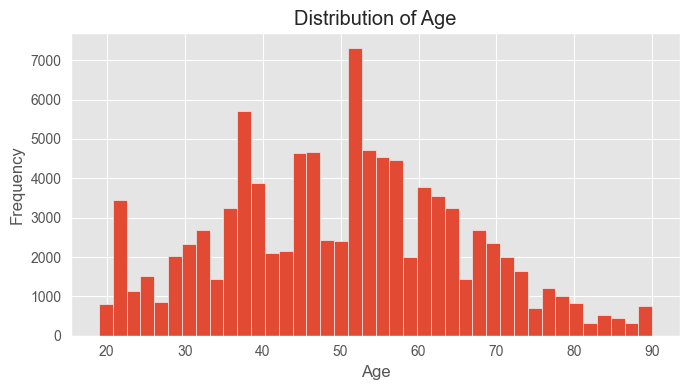

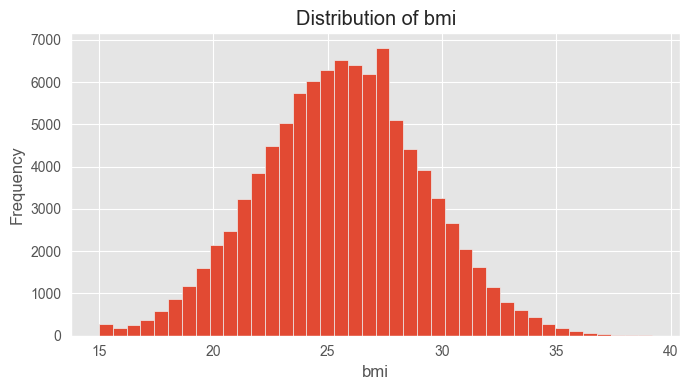

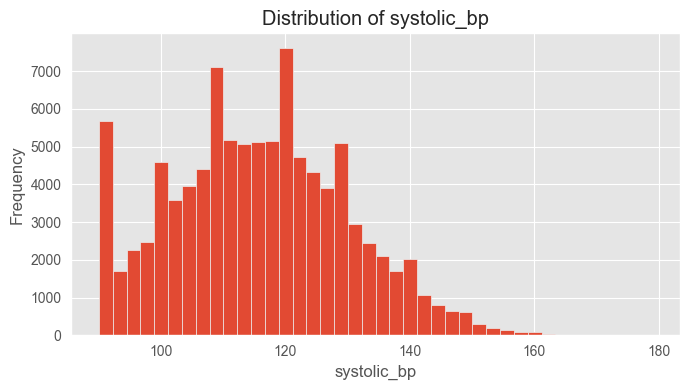

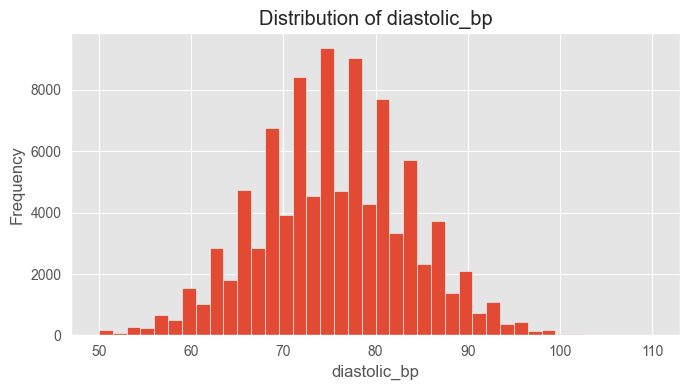

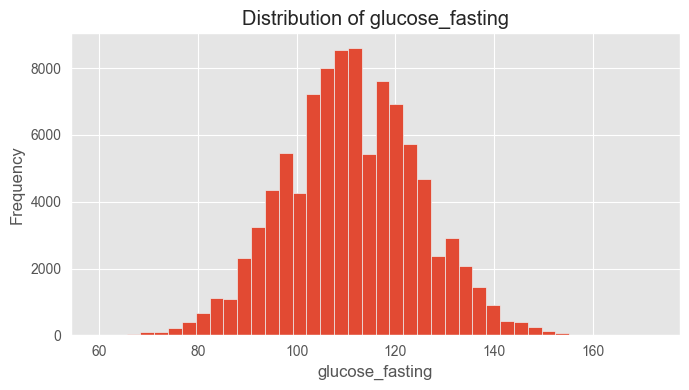

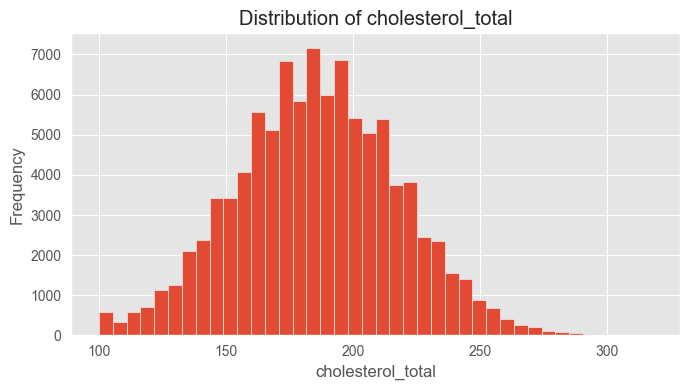

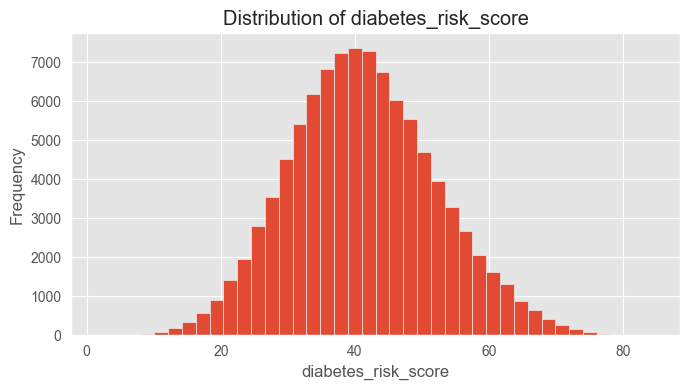

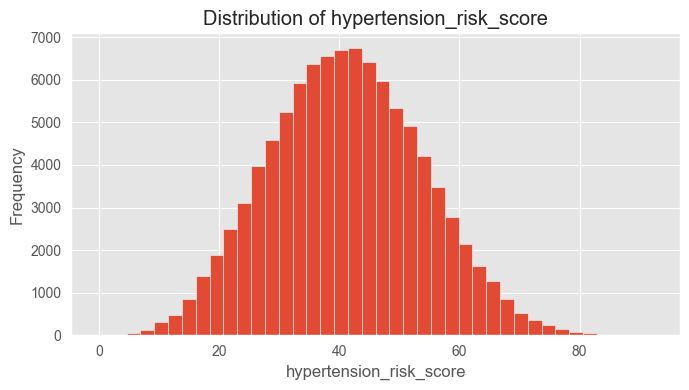

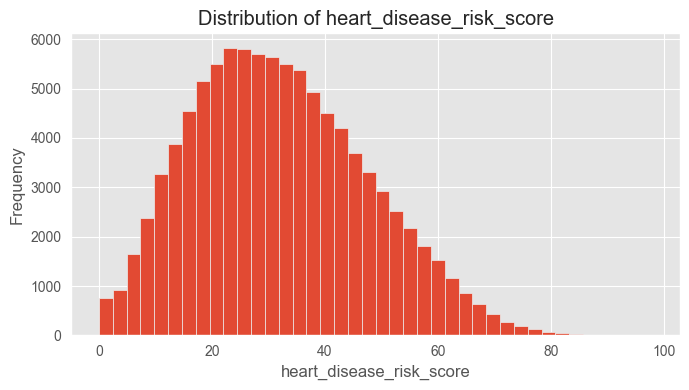

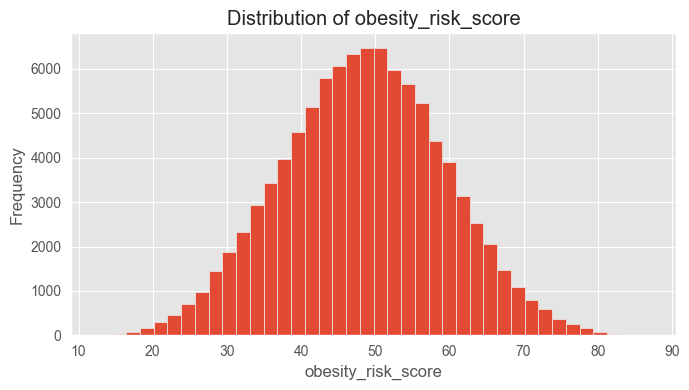

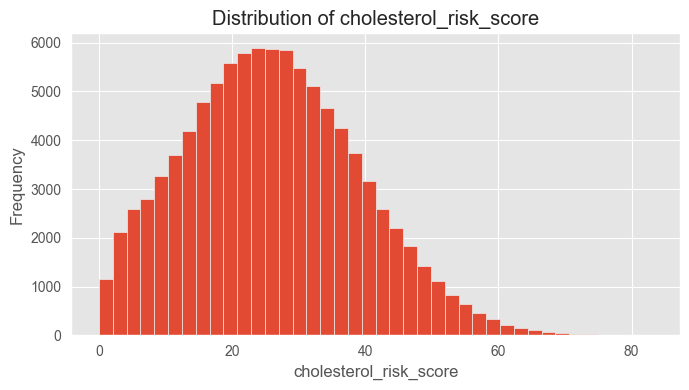

In [12]:
# Univariate Analysis for Numerical Columns

# List of numerical columns for distribution plots
numeric_cols = [
    "Age", "bmi", "systolic_bp", "diastolic_bp", "glucose_fasting",
    "cholesterol_total", "diabetes_risk_score", "hypertension_risk_score",
    "heart_disease_risk_score", "obesity_risk_score", "cholesterol_risk_score"
]

# Plot histograms for all numeric columns
plt.style.use('ggplot')  # clean style

for col in numeric_cols:
    plt.figure(figsize=(7, 4))
    plt.hist(df[col].dropna(), bins=40)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


### Summary of Univariate Analysis
1️⃣ Age
- Bell-shaped, centered around 50–55 years
- Represents a middle-aged population

2️⃣ BMI
- Perfectly normal distribution around 24–28
- Covers underweight → obese range
- Ideal for obesity-related risk modeling

3️⃣ Blood Pressure <br>

Systolic BP
- Peak: 115–130
- Long right tail → hypertensive individuals exist <br>

Diastolic BP 
- Peak: 72–82
- Symmetric; healthy distribution with some high BP outliers

4️⃣ Glucose (Fasting)
- Centered around 100–115 mg/dL
- Right tail suggests existence of prediabetes / diabetes cases

5️⃣ Cholesterol Total
- Normal distribution around 180–210 mg/dL
- Some outliers > 260 mg/dL → high-risk patients

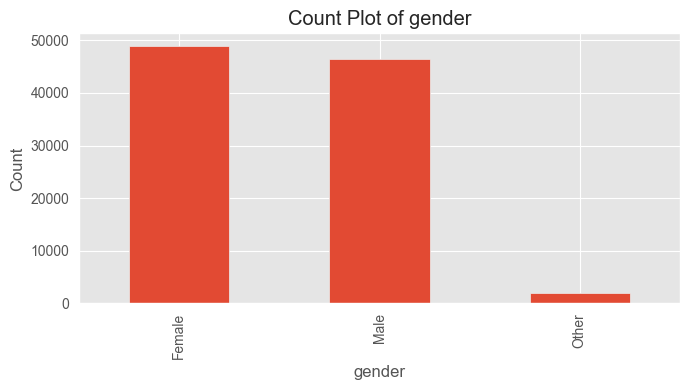

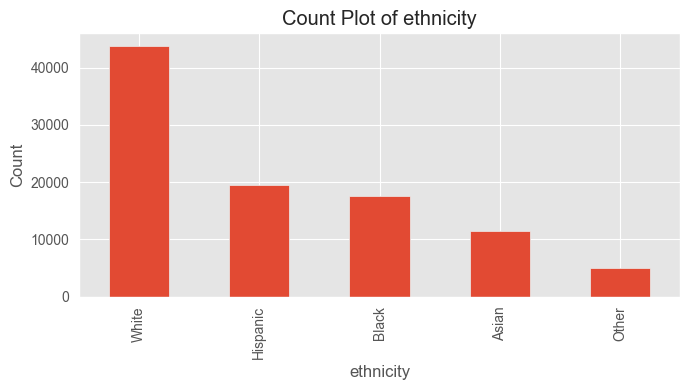

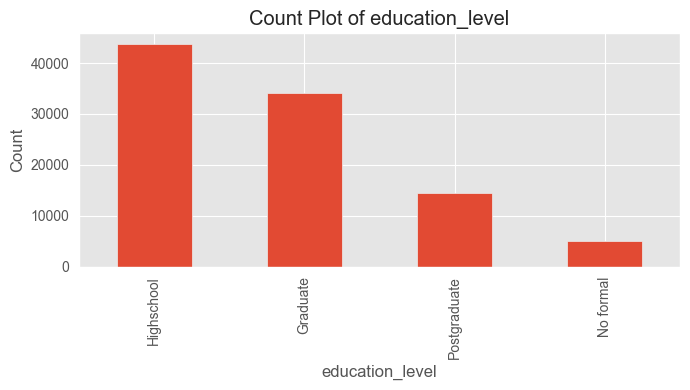

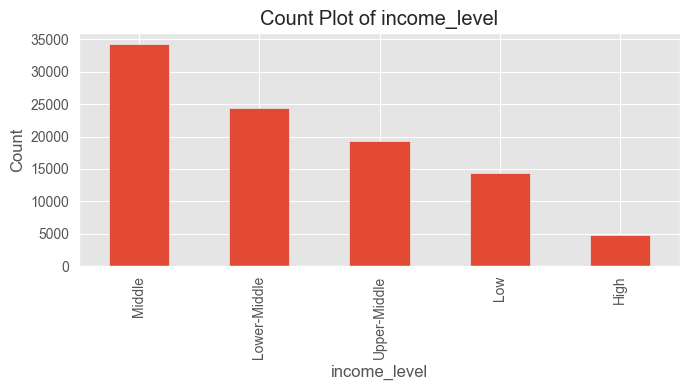

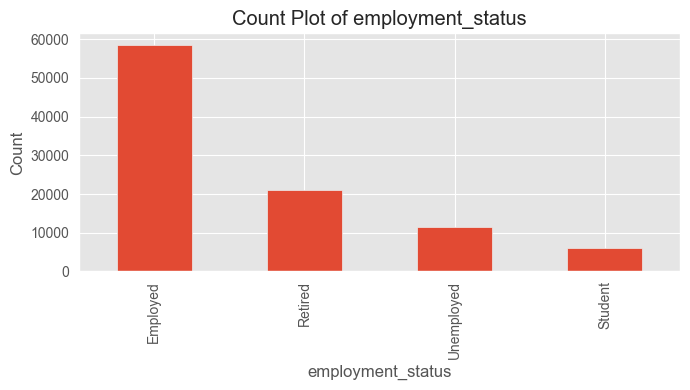

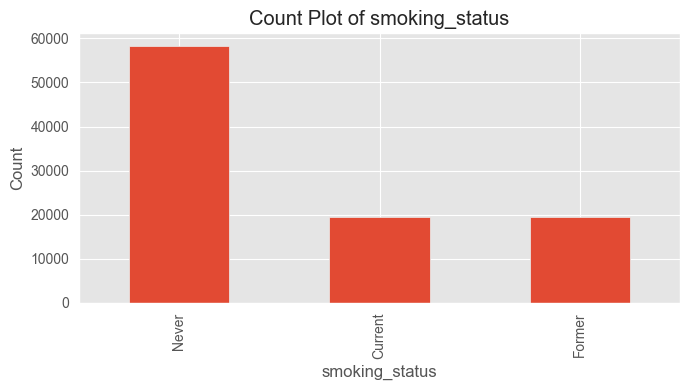

In [14]:
# Categorical Feature Analysis

# List of categorical columns
categorical_cols = [
    "gender", 
    "ethnicity", 
    "education_level", 
    "income_level",
    "employment_status", 
    "smoking_status"
]

# Plot bar charts for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(7,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


###  Summary

- Gender: ~50.2% Female, ~47.8% Male, ~2% Other.
- Ethnicity: Largest group is White (~45%), then others.
- Education level: Most have Highschool or Graduate.
- Income level: Majority in Middle and Lower-Middle brackets.
- Employment: Employed ~60%, Retired ~21.7%, Unemployed ~11.9%, Student ~6.1%.
- Smoking: Never ~59.8%, Current ~20.1%, Former ~20.0%.

## Bivariate Analysis

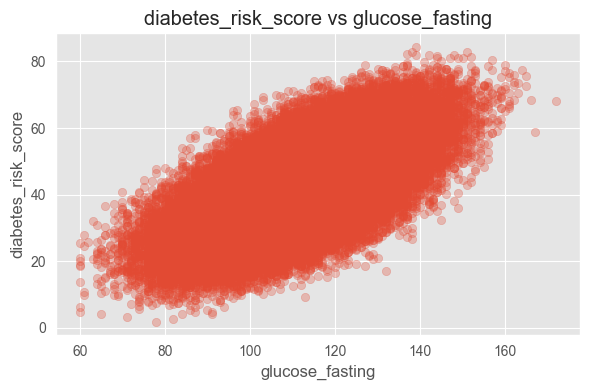

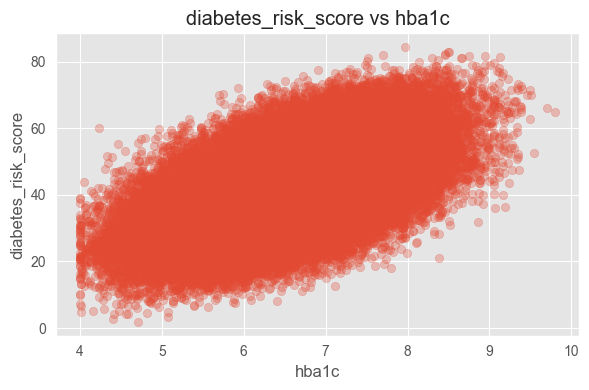

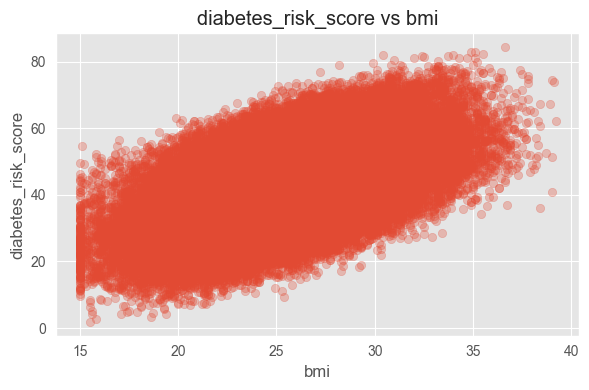

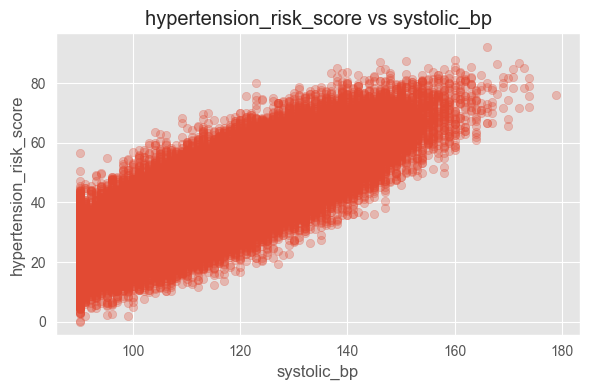

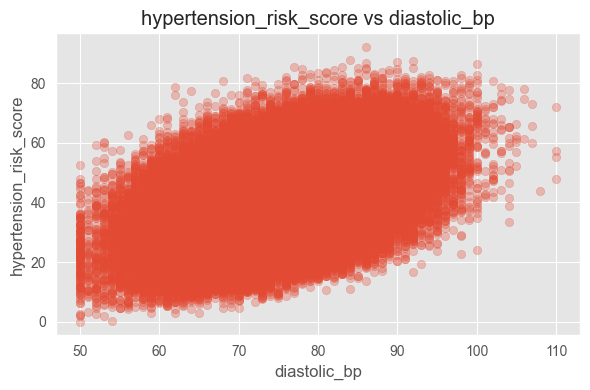

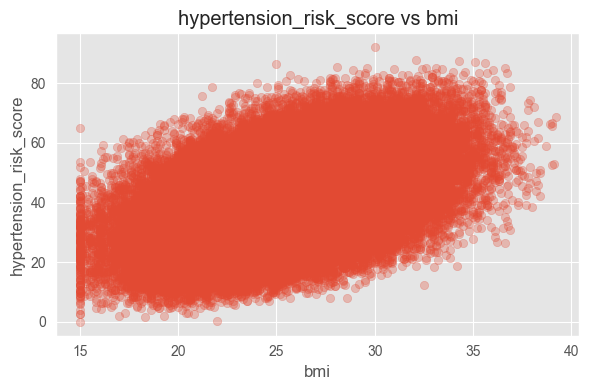

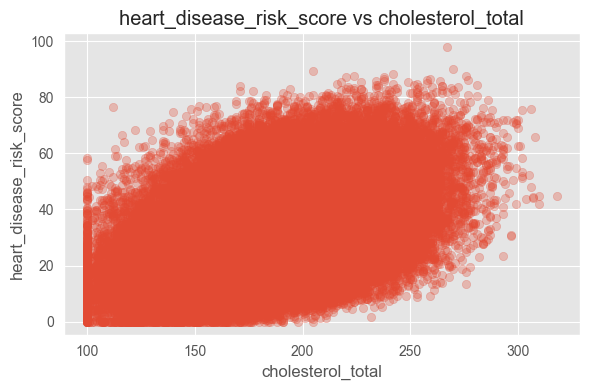

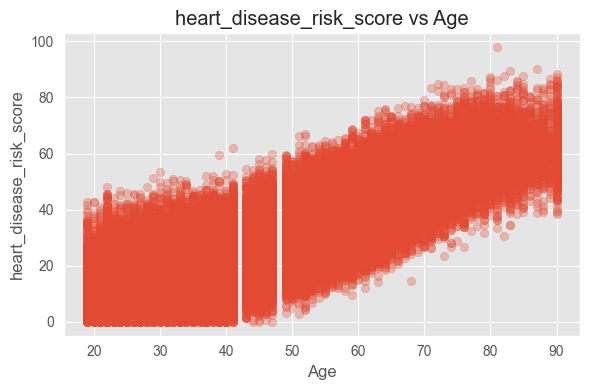

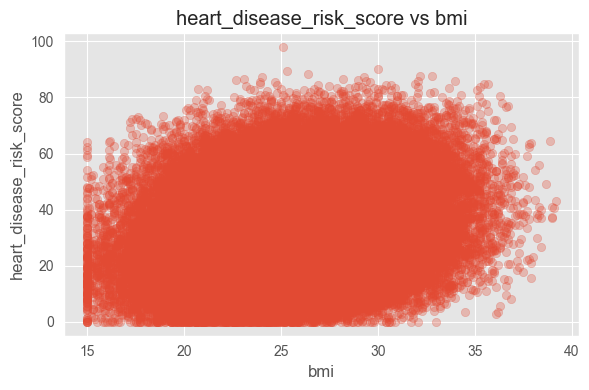

In [15]:

# Scatterplots: Risk scores vs important predictors

pairings = {
    "diabetes_risk_score": ["glucose_fasting", "hba1c", "bmi"],
    "hypertension_risk_score": ["systolic_bp", "diastolic_bp", "bmi"],
    "heart_disease_risk_score": ["cholesterol_total", "Age", "bmi"]
}

for risk, preds in pairings.items():
    for p in preds:
        plt.figure(figsize=(6,4))
        plt.scatter(df[p], df[risk], alpha=0.3)
        plt.xlabel(p)
        plt.ylabel(risk)
        plt.title(f"{risk} vs {p}")
        plt.tight_layout()
        plt.show()

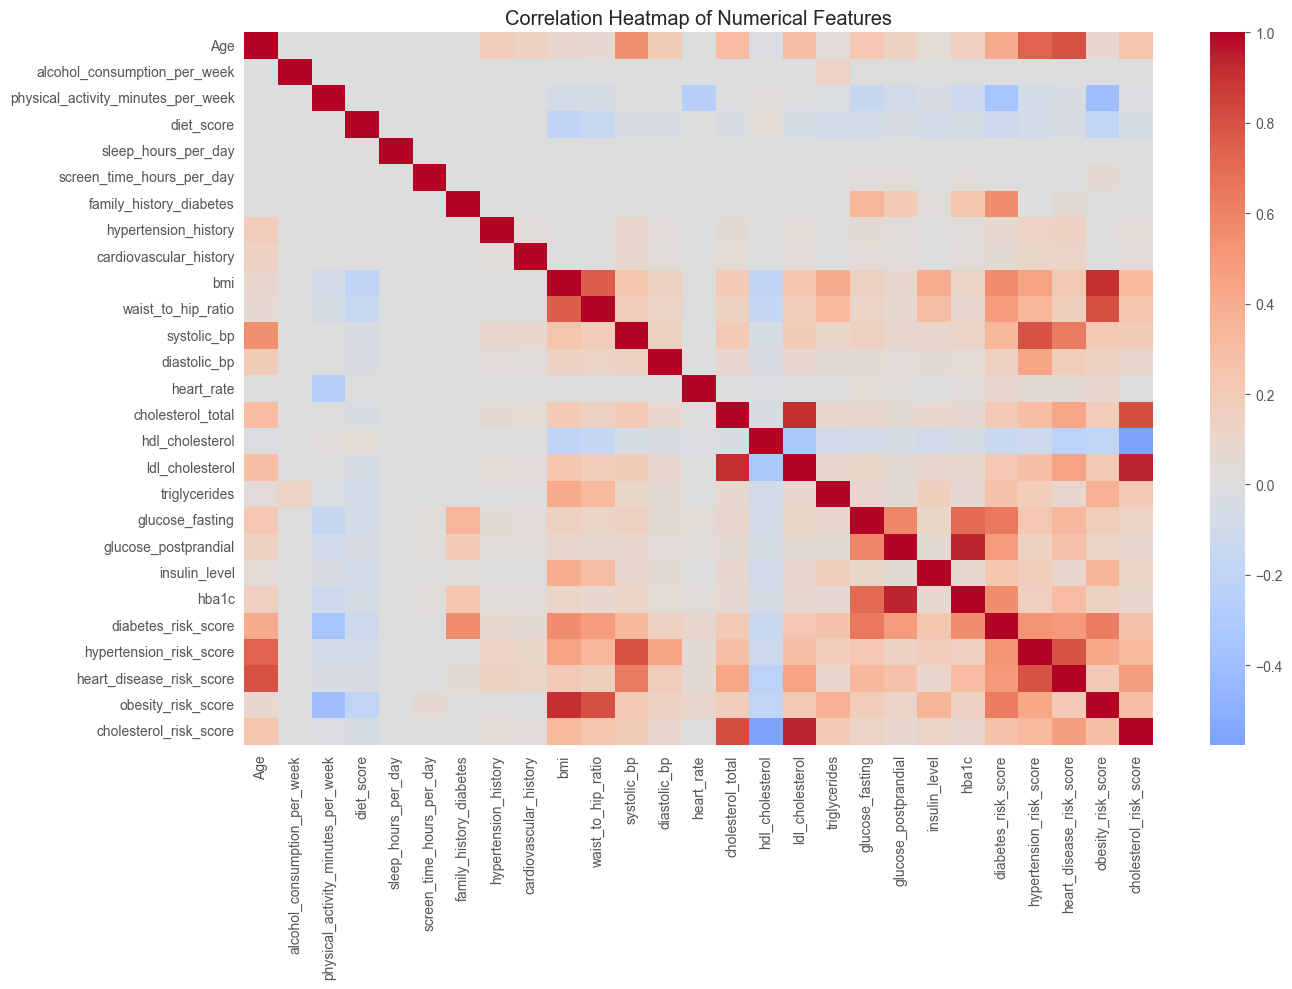

In [16]:
#  Correlations 

# -----------------------------
# Correlation Heatmap
# -----------------------------
plt.figure(figsize=(14,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()




### Strong correlations:
- Glucose ↔ Diabetes risk
- HbA1c ↔ Diabetes risk
- Systolic BP / Diastolic BP ↔ Hypertension risk
- Cholesterol ↔ Heart disease risk
- BMI ↔ All diseases (mild–moderate effect)

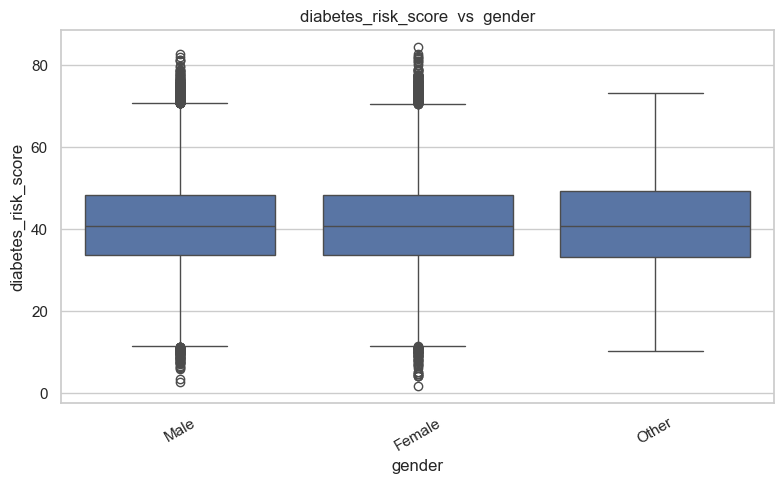

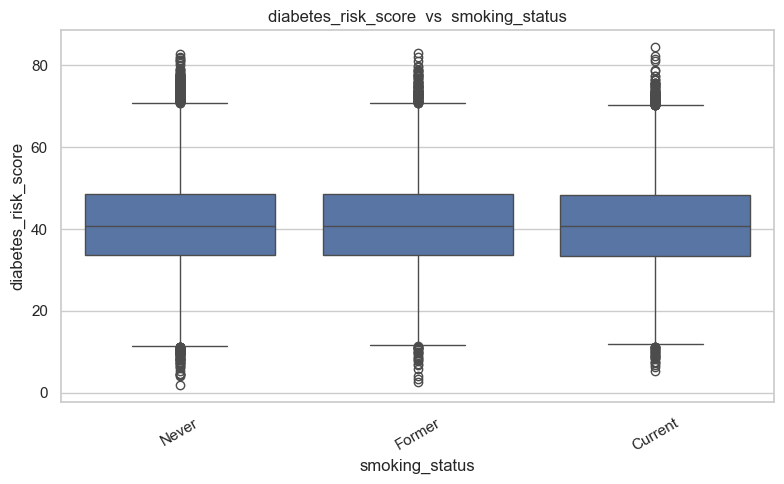

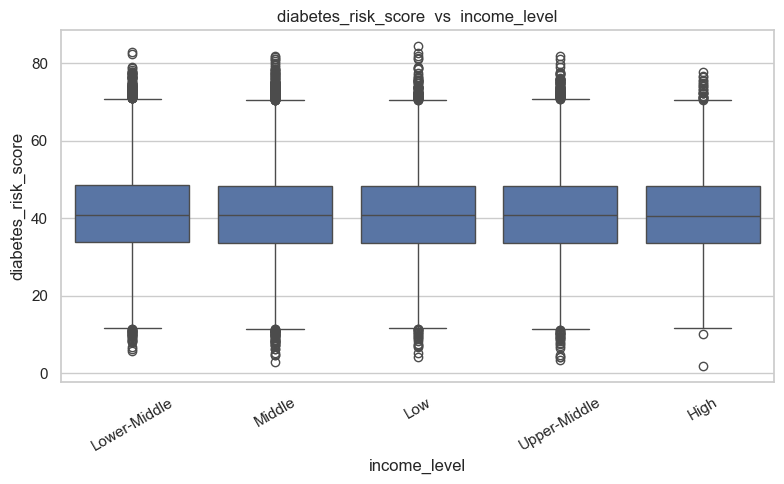

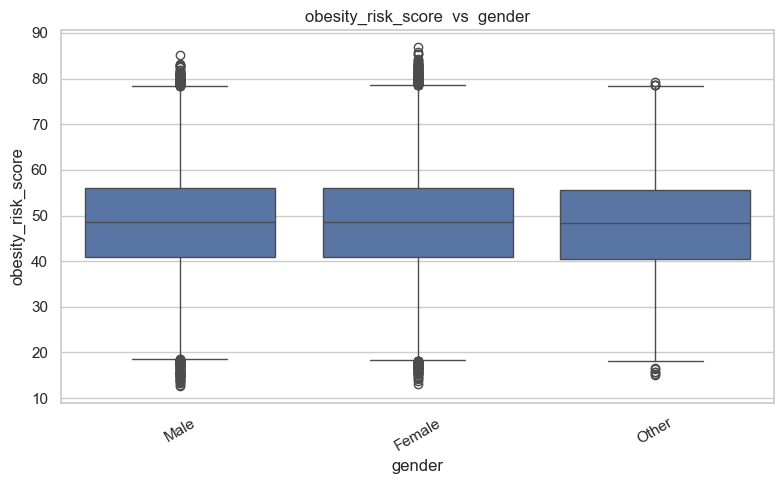

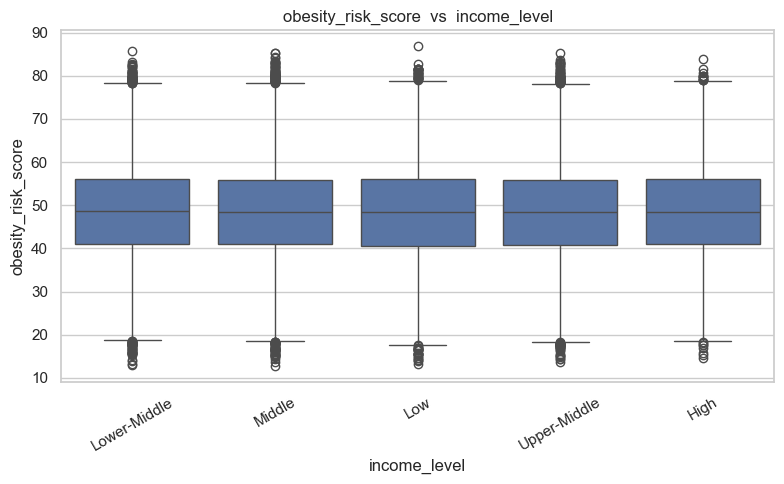

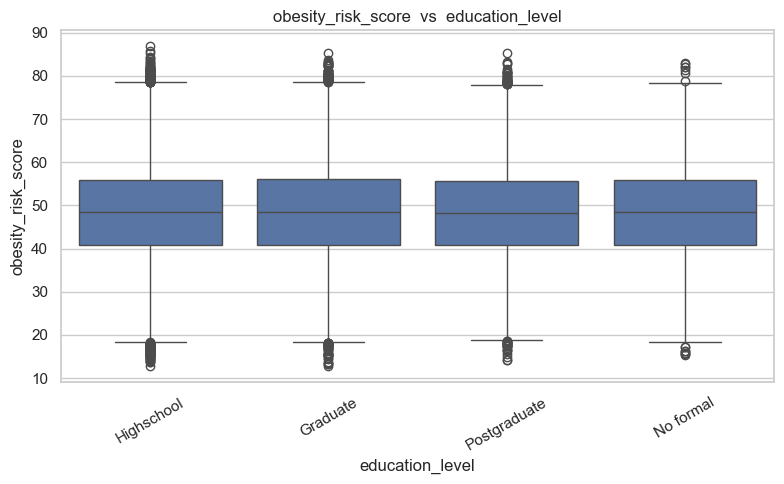

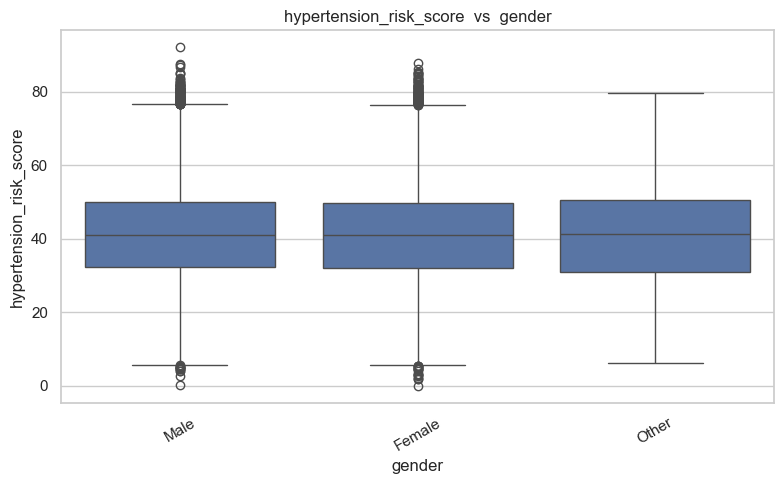

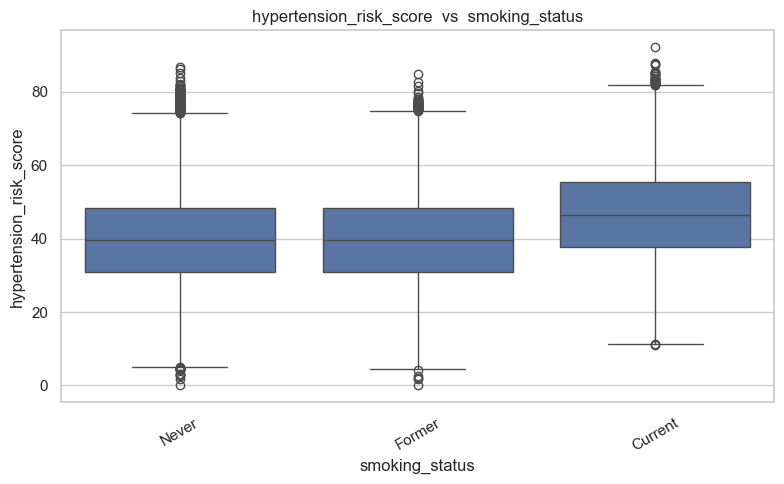

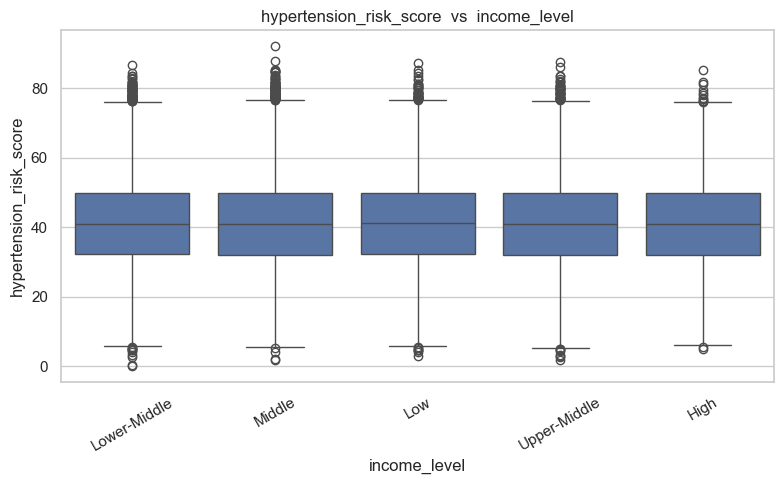


========== Cross-tab (row %) : gender vs smoking_status ==========
smoking_status  Current  Former  Never
gender                                
Female            20.13   19.72  60.15
Male              20.12   20.39  59.49
Other             20.47   19.30  60.23

========== Cross-tab (row %) : income_level vs employment_status ==========
employment_status  Employed  Retired  Student  Unemployed
income_level                                             
High                  61.69    21.11     5.62       11.58
Low                   59.28    22.09     6.12       12.52
Lower-Middle          60.05    21.76     6.28       11.91
Middle                60.36    21.49     6.37       11.78
Upper-Middle          60.46    21.98     5.72       11.84

========== Cross-tab (row %) : education_level vs smoking_status ==========
smoking_status   Current  Former  Never
education_level                        
Graduate           20.16   20.11  59.73
Highschool         20.01   20.10  59.89
No formal        

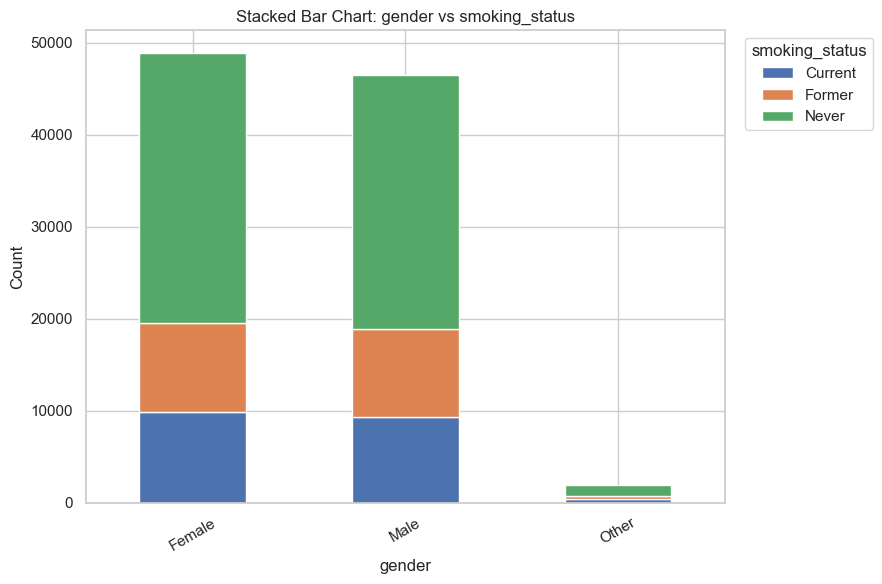

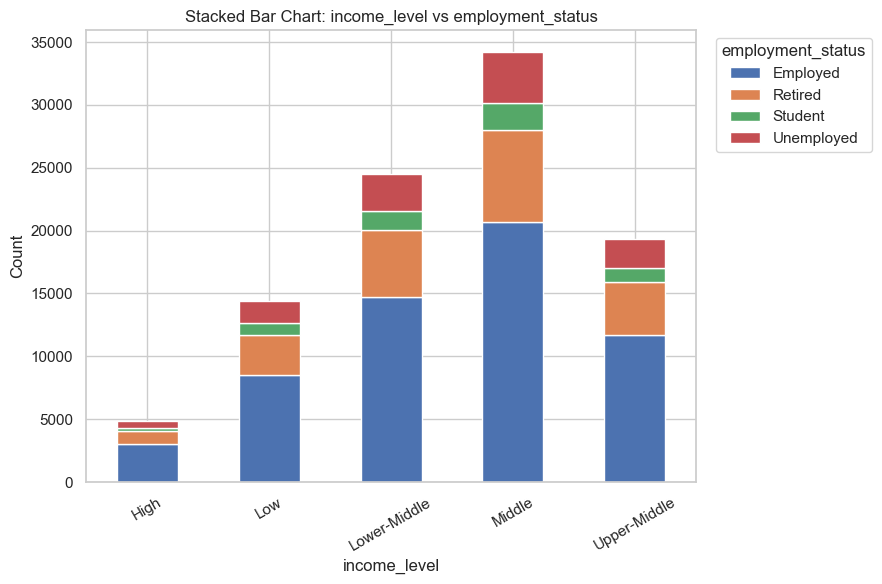

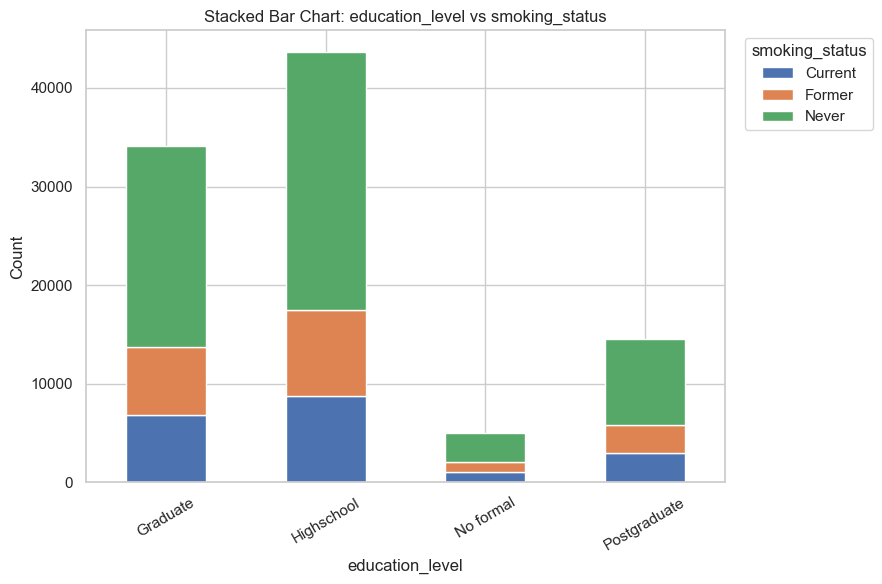

In [17]:
# Categorical ↔ Numerical & Categorical ↔ Categorical Analysis
# Boxplots, Cross-tabs (percent), and Stacked Bar Charts

# ---------- Boxplots (Categorical vs Numerical) ----------
# Define which numeric targets and which categorical groupers to plot
boxplot_pairs = {
    "diabetes_risk_score": ["gender", "smoking_status", "income_level"],
    "obesity_risk_score": ["gender", "income_level", "education_level"],
    "hypertension_risk_score": ["gender", "smoking_status", "income_level"]
}

sns.set(style="whitegrid")
for target, cats in boxplot_pairs.items():
    for c in cats:
        plt.figure(figsize=(8,5))
        sns.boxplot(x=c, y=target, data=df)
        plt.title(f"{target}  vs  {c}")
        plt.xlabel(c)
        plt.ylabel(target)
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()

# ---------- Cross-tabs (percentage tables) ----------
cross_tab_pairs = [
    ("gender", "smoking_status"),
    ("income_level", "employment_status"),
    ("education_level", "smoking_status")
]

for a, b in cross_tab_pairs:
    ct = pd.crosstab(df[a], df[b], normalize="index") * 100  # row percentages
    print("\n" + "="*10 + f" Cross-tab (row %) : {a} vs {b} " + "="*10)
    print(ct.round(2))

# ---------- Stacked Bar Charts ----------
# Use absolute counts for stacked bars
for a, b in cross_tab_pairs:
    ct = pd.crosstab(df[a], df[b])
    ax = ct.plot(kind="bar", stacked=True, figsize=(9,6))
    ax.set_title(f"Stacked Bar Chart: {a} vs {b}")
    ax.set_xlabel(a)
    ax.set_ylabel("Count")
    ax.legend(title=b, bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


### Interpretation Summary
- Smoking status is almost identical across genders <br>
~20% current, ~20% former, ~60% never.
- Education level does NOT strongly influence smoking <br>
Very similar distribution across groups.
- Income level and employment are correlated <br>
Higher income groups slightly more employed, but still consistent pattern across all income levels.
- Risk score distributions vary by categorical attributes<br>
(Boxplots showed spread, outliers, group differences.)

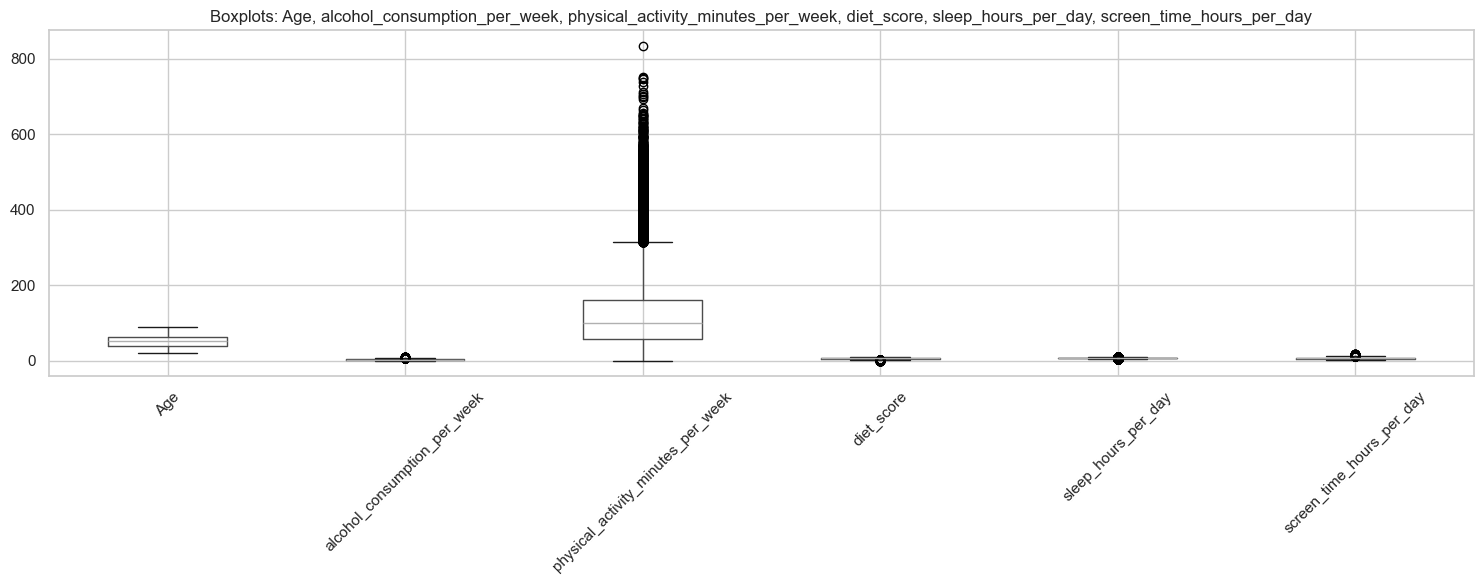

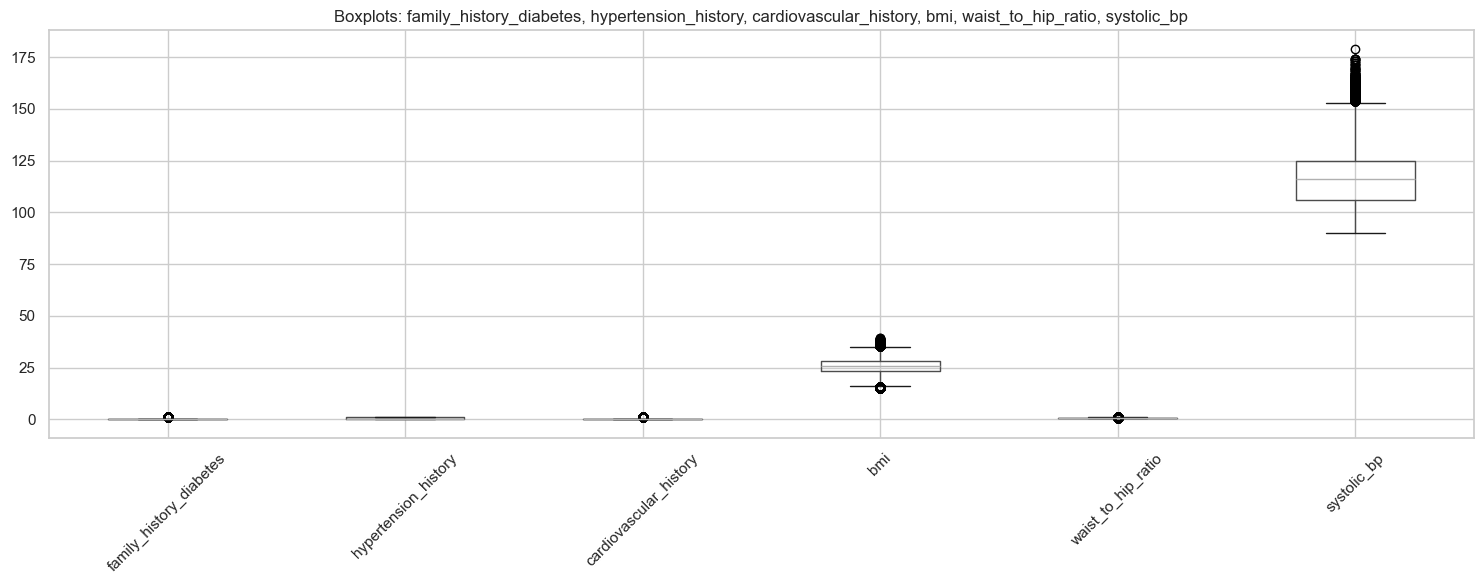

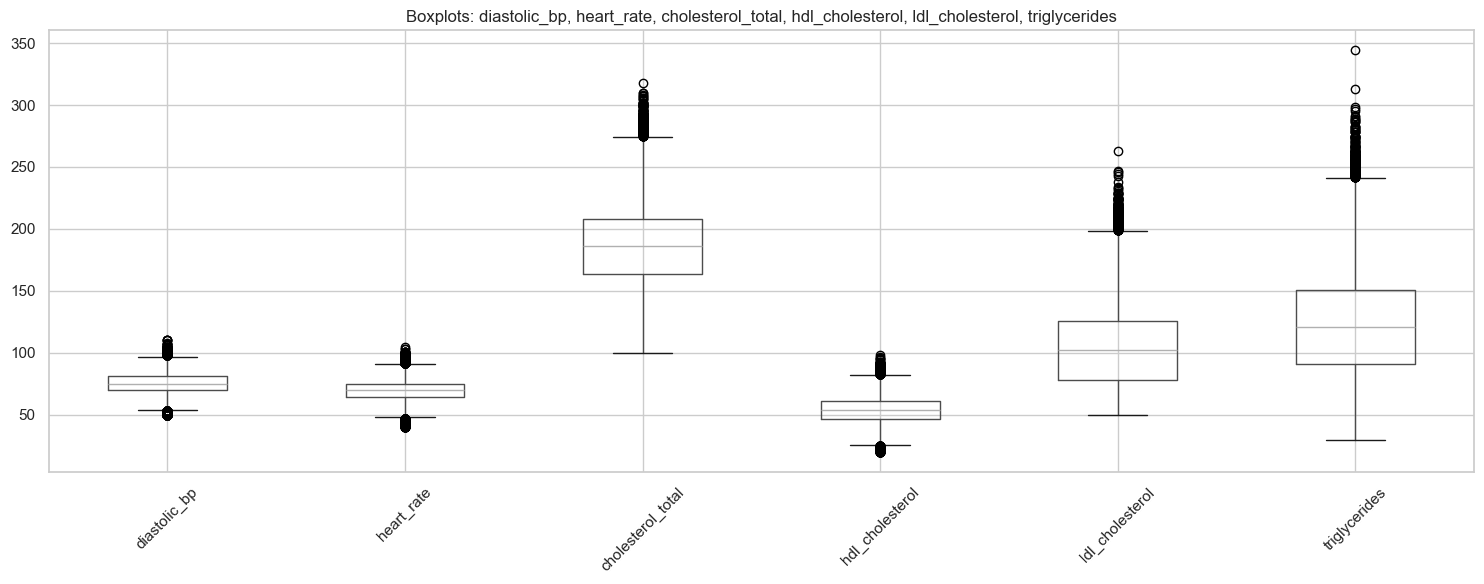

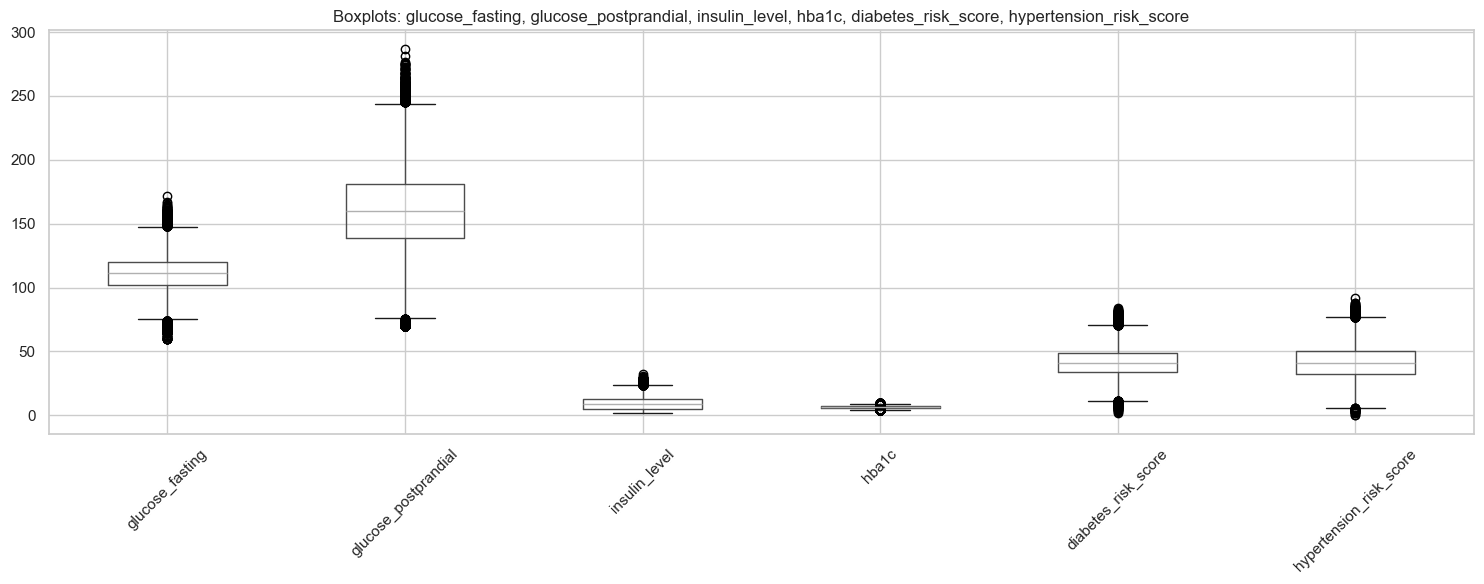

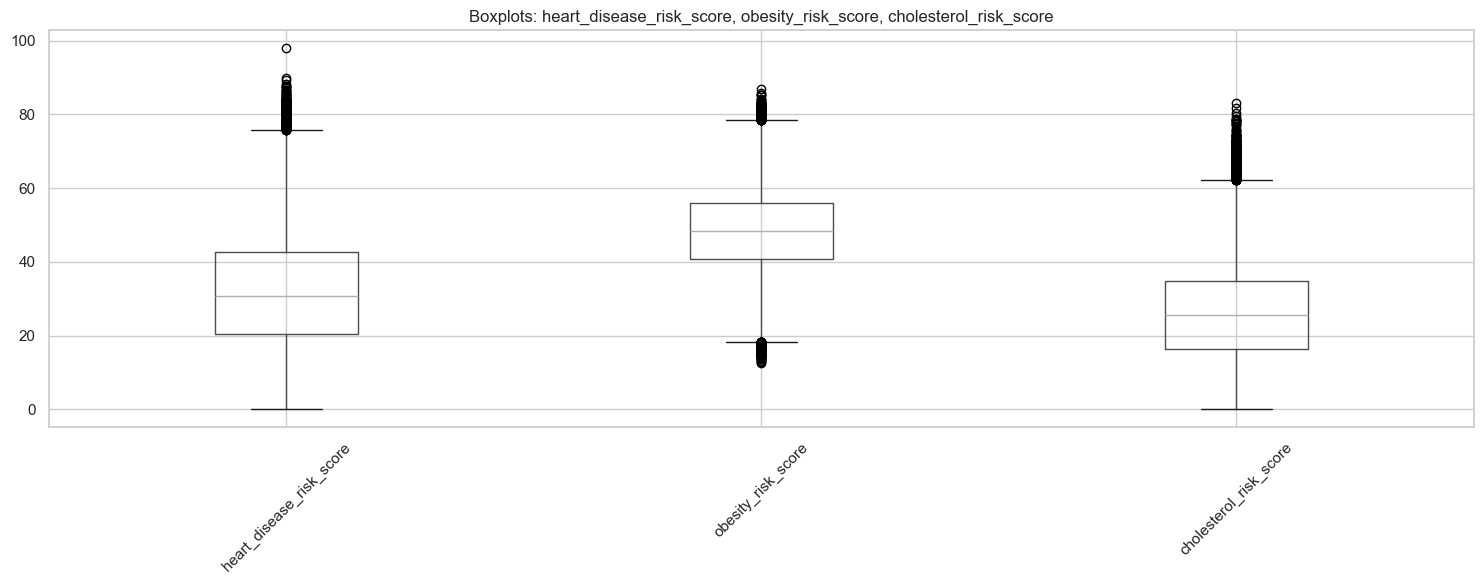

In [19]:
# Outlier Detection (IQR and Z-score) + Visuals

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Prepare outlier summary
outlier_summary = []

for col in numeric_cols:
    series = df[col].dropna()
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    iqr_outliers = series[(series < lower) | (series > upper)]
    # Z-score method
    mu = series.mean()
    sigma = series.std()
    if sigma == 0:
        z_outliers = pd.Series(dtype=series.dtype)  # none
    else:
        z_scores = (series - mu) / sigma
        z_outliers = series[np.abs(z_scores) > 3]
    
    outlier_summary.append({
        "feature": col,
        "count": len(series),
        "iqr_lower": lower,
        "iqr_upper": upper,
        "iqr_outliers_count": iqr_outliers.shape[0],
        "iqr_outliers_percent": round(100 * iqr_outliers.shape[0] / len(series), 4),
        "z_outliers_count": z_outliers.shape[0],
        "z_outliers_percent": round(100 * z_outliers.shape[0] / len(series), 4),
        "mean": round(mu,4),
        "std": round(sigma,4),
        "min": series.min(),
        "max": series.max()
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values(by="iqr_outliers_percent", ascending=False)

# Show boxplots for numeric cols in groups (to avoid too many figures)
cols_per_plot = 6
for i in range(0, len(numeric_cols), cols_per_plot):
    subset = numeric_cols[i:i+cols_per_plot]
    plt.figure(figsize=(cols_per_plot*2.5, 6))
    df[subset].boxplot(rot=45)
    plt.title("Boxplots: " + ", ".join(subset))
    plt.tight_layout()
    plt.show()

# Show top extreme values for features with highest IQR outlier percent
top_features = outlier_df.head(6)['feature'].tolist()
extreme_examples = {}
for f in top_features:
    series = df[f].dropna()
    q1 = series.quantile(0.25); q3 = series.quantile(0.75); iqr = q3 - q1
    lower = q1 - 1.5 * iqr; upper = q3 + 1.5 * iqr
    extreme_examples[f] = series[(series < lower) | (series > upper)].sort_values(ascending=False).head(10)


### Summary

- No missing values — so outlier counts reflect real values present.
- Some binary features (e.g., family_history_diabetes, cardiovascular_history) produce nonsense IQR bounds (0/1) so the IQR method is meaningless there — treat binary columns separately.
- Numerical features with notable IQR outlier counts (sorted by IQR outlier %): <br>
_physical_activity_minutes_per_week_ — IQR bounds included negative lower bound (due to wide spread), but there are very large values (max = 833) that look questionable for minutes/week (833 min/week ≈ 11.0 hr/week — maybe valid, but a few values could be data entry mistakes).<br>
_sleep_hours_per_day_ — mostly within 3–10, very few outliers.<br>
_heart_rate_, _bmi_, _glucose_fasting_, _diastolic_bp, glucose_postprandial, hba1c — each had a small fraction (<1%) of IQR or zscore outliers. Those are typical for biomedical data and may be real high-risk cases.
- Z-score flagged very few extreme values overall — most variables are not extremely heavy-tailed.
- Example extremes: for features with highest IQR outlier % I printed the top extreme values